# Concevez une application au service de la santé publique

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1.  [Data loading](#0)<br>
2.  [Features selection](#1)<br>
3.  [Dealing with missing or erroneous data](#2) <br>

</div>

# Data loading<a id="0"> </a>

We first import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

We load the data.

In [2]:
raw_data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep="\t", low_memory=False)
print("Our dataset contains {} columns and {} rows".format(raw_data.shape[1], raw_data.shape[0]))

Our dataset contains 162 columns and 320772 rows


In [3]:
#Let's see what our dataset contains
raw_data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


The result of the descriptive statistics shows us that there is many unaivailable data for many feature in one part, and in other part, in other part, we can see some absurd values in our dataset (negative quantity and a quantity that outlie quantity of the composante).

By this observation, we need to deal with the unaivable value that can be deal, clean the absurd values and deal with duplicated value if there exist.
We need to deal these cleaning task, then we can work on the feature type.

## Features selection<a name="1"></a>

Features selection mainly depends on two elements : the data availability and the phenomene we want to analyse.

In this section, we will make a technical selection of the feature according to the data availability and we will select among these features to respond our question of interest.

We define a function to perform our technical selection.

In [4]:
def technical_variable_choice(df, threshold, fill=False):
    
    
    if not fill:
        
        print("Searching for NaN rate in the features")
        df_fill =  round(df.isnull().mean()*100, 2).sort_values(ascending=False).reset_index()   
        df_fill.columns = ["features", "missing_rate"]
        print("... NaN rate in the features done!")
        print('Technical selection in the features')
        df_select =  df_fill[df_fill["missing_rate"] < threshold].sort_values("missing_rate", ascending=True)
        print("... Technical selection done!")
        
        fig = plt.figure(figsize=(25, 30))
        font_title = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold','size': 20,}
        
        sns.barplot(data=df_fill, x = "missing_rate", y="features", palette='pastel')
        
        plt.axvline(x=threshold, linewidth=4, color="r")
        plt.text(threshold+2, 99, "Features removal threshod", fontsize = 25, color = "r")
        plt.title("Features NaN rate in the dataset", fontdict=font_title)
        plt.show()
        
    else:
        print("Searching for filling rate in the dataset")
        df_fill = round(df.notna().mean()*100, 2).sort_values(ascending=False).reset_index() 
        df_fill.columns = ["features", "filling_rate"]
        print("... filling rate in the dataset done!")
        print('Technical selection of the dataset')
        df_select = df_fill[df_fill.filling_rate >= threshold].sort_values("filling_rate", ascending=True)
        print("... Technical selection done!")
        
        fig = plt.figure(figsize=(25, 30))
        font_title = {'family': 'serif', 'color':  '#114b98', 'weight': 'bold','size': 20,}
        
        sns.barplot(data=df_fill, x = "filling_rate", y="features", palette='pastel')
        
        plt.axvline(x=threshold, linewidth=4, color="r")
        plt.text(threshold-threshold*2/3, 65, "Features removal threshod in the dataset", fontsize = 20,  color = "r")
        plt.title("Features filling rate in the dataset", fontdict=font_title)
        plt.show()
    
   
    return df_fill, df_select

We perform the technical selection by selecting 75% as the threshold level. This mean all of our features will have at least 25% of data completion

Searching for NaN rate in the features
... NaN rate in the features done!
Technical selection in the features
... Technical selection done!


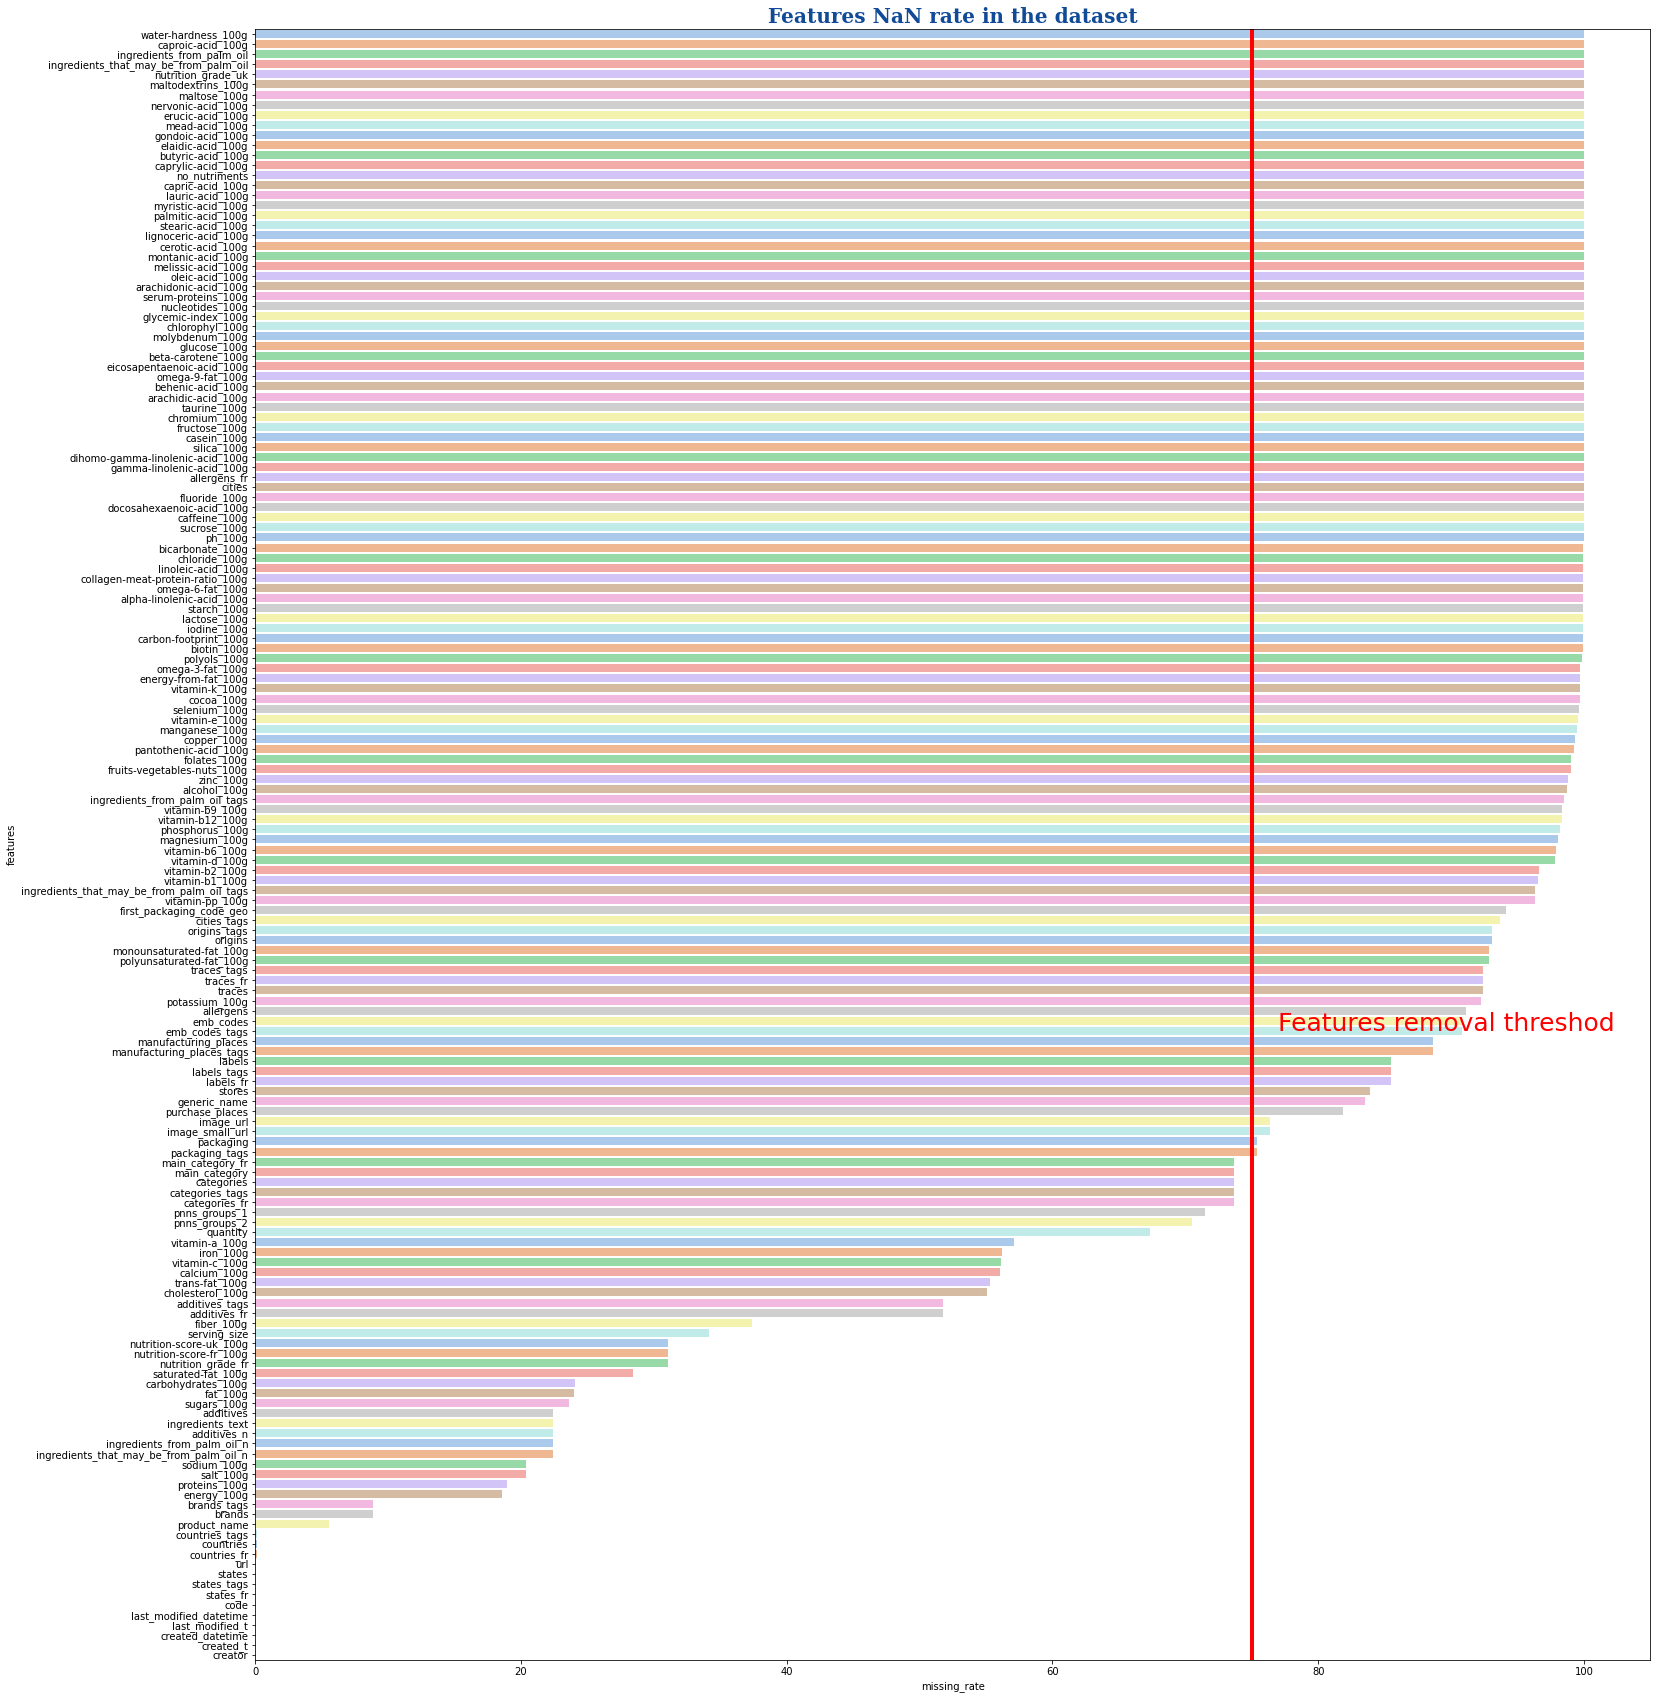

In [5]:

pd.set_option('display.max_rows', 300)
df_nan = technical_variable_choice(raw_data, 75, False)[1]

In [6]:
# We store the technical features selection into a list
var=df_nan["features"].to_list()
print("There is {} features above our threshold".format(len(var)))
print(var)

There is 50 features above our threshold
['creator', 'last_modified_datetime', 'created_t', 'created_datetime', 'last_modified_t', 'code', 'states_fr', 'states_tags', 'states', 'url', 'countries_fr', 'countries', 'countries_tags', 'product_name', 'brands_tags', 'brands', 'energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n', 'additives_n', 'ingredients_text', 'additives', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'saturated-fat_100g', 'nutrition_grade_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'serving_size', 'fiber_100g', 'additives_fr', 'additives_tags', 'cholesterol_100g', 'trans-fat_100g', 'calcium_100g', 'vitamin-c_100g', 'iron_100g', 'vitamin-a_100g', 'quantity', 'pnns_groups_2', 'pnns_groups_1', 'categories_fr', 'categories_tags', 'categories', 'main_category', 'main_category_fr']


In [7]:
#We select our data frame
df_var = raw_data[var]
#let's drop the line where product name is empty
df_var = df_var.dropna(subset="product_name")
#Let's summarize our Data Frame
df_var.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,2.577730e+05,256621.000000,252527.000000,252488.000000,247091.000000,247091.000000,247091.000000,241910.000000,240584.000000,240276.000000,226641.000000,218463.000000,218463.000000,198587.000000,143950.000000,143159.000000,140837.000000,140655.00000,140305.000000,137398.000000
mean,1.140497e+03,7.073898,2.037957,0.802467,0.055016,0.018912,1.937748,15.993129,12.701388,32.091647,5.115709,9.151724,9.044406,2.863581,0.020079,0.073428,0.125119,0.02335,0.003654,0.000397
std,6.484434e+03,8.418674,129.023620,50.800621,0.268732,0.137898,2.503582,22.345150,17.574028,29.765368,8.008095,9.052588,9.180977,12.933636,0.358234,1.540612,3.320757,2.23813,0.214528,0.073320
min,0.000000e+00,-800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.860000,0.000000,0.000000,0.000000,-15.000000,-15.000000,-6.700000,0.000000,-3.570000,0.000000,-0.00210,-0.000260,-0.000340
25%,3.730000e+02,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,1.300000,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.100000e+03,4.760000,0.584200,0.230000,0.000000,0.000000,1.000000,5.710000,5.000000,20.600000,1.790000,10.000000,9.000000,1.500000,0.000000,0.000000,0.035000,0.00000,0.001010,0.000000
75%,1.674000e+03,10.000000,1.379220,0.543000,0.000000,0.000000,3.000000,24.000000,20.000000,58.500000,7.140000,16.000000,16.000000,3.600000,0.020000,0.000000,0.106000,0.00370,0.002400,0.000107
max,3.251373e+06,430.000000,64312.800000,25320.000000,6.000000,2.000000,31.000000,3520.000000,714.290000,2916.670000,550.000000,40.000000,40.000000,5380.000000,95.238000,369.000000,694.737000,716.98110,50.000000,26.700000


In [8]:
df_var[["nutrition_grade_fr", "pnns_groups_1", "pnns_groups_2"]].astype("category").dtypes

nutrition_grade_fr    category
pnns_groups_1         category
pnns_groups_2         category
dtype: object

## Dealing with missing or erroneous data<a id="2"></a>

Since we select the features according to some define thresold, now, we focus on row cleaning. If a row contains many empties values, filling these values with mean or median could lead to an fictional row. As a result, this can give us an erroneous analysis.

We create a function to perform row cleannig according to some rate of row completion.

In [9]:
def clean_nan_rows(df, columns_to_use, threshold):
    """
    df = is the dataframe
    columns_to_use = add the selected columns as a list
                    If it's apply on all of the dataframe features, use df.columns
    
    threshold = represent the percentage of non nan in a rows that we want to drop.
                it's equal to 0 if we want to drop the rows where all columns is nan.
                If it's 1, it drop all the rows
    """
    
    count_nan = df[columns_to_use].isnull().sum(axis=1)
    number_of_nan_columns=int(len(columns_to_use) - threshold*len(columns_to_use))
    print("There's {} unusable rows".format(sum(count_nan >= number_of_nan_columns)))
    print("Cleaning nan rows....")
    usuable_index = (count_nan < number_of_nan_columns)
    df_rows_clean = df[usuable_index]
    print("... nan rows cleaned!")
    
    return df_rows_clean

In [10]:
#We select the row we want to clean
#We select numerical feature and exclude some features
useless_num_features=['ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n']
numerical_features = list(df_var.select_dtypes(include="number").columns)
for i in useless_num_features:
    numerical_features.remove(i)

In [11]:

#We define 30% as the thresold.
#We keep rows which have at least 30% completion relative to our features selection.
df_clean_row=clean_nan_rows(df_var, numerical_features, 0.0)
df_clean_row.shape

There's 30403 unusable rows
Cleaning nan rows....
... nan rows cleaned!


(272607, 50)

After row cleaning, we need now to drop some absurd values. Indeed, in our statistical description, we can see that we have some negative quantitative values and some values which must not exceed 100 but exceed 100. These values are a absurd value which must be drop in our datset.


To do this, we define a function to identify these value then, we drop them.

In [12]:
def absurd_value_cleaning(data, columns, special=None):
    
    df=data.copy()
    for col in columns:
        if col.endswith("_100g") and col!="energy_100g":
            print(col)
            df=df.drop(df[df[col]<0].index)
            df=df.drop(df[df[col]>100].index)
    
    if special:
        
        df=df.drop(df[df[special].sum(axis=1)>=100].index)  
    print("There are {} rows which contain absurd values".format(data.shape[0]-df.shape[0]))          
        
    return df

In [13]:
special = ['proteins_100g', 'fat_100g', 'carbohydrates_100g']
df_absurd_clean= absurd_value_cleaning(df_clean_row, numerical_features, special)
df_absurd_clean.shape

proteins_100g
salt_100g
sodium_100g
sugars_100g
fat_100g
carbohydrates_100g
saturated-fat_100g
nutrition-score-fr_100g
nutrition-score-uk_100g
fiber_100g
cholesterol_100g
trans-fat_100g
calcium_100g
vitamin-c_100g
iron_100g
vitamin-a_100g
There are 44459 rows which contain absurd values


(228148, 50)

We need to clean outliers

In [14]:
def IQR_outliers(data, columns_of_interest):

    df=data.copy()
    for col in df[columns_of_interest].select_dtypes(include="number").columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        print("Inter Quartile Range for {} is {}".format(col, IQR))
        df=df[~((df[col]<(Q1-1.5*IQR))| (df[col]>(Q3+1.5*IQR)))].reset_index(drop=True)
    
        
    return df

In [15]:
interest=['product_name', 'energy_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'nutrition_grade_fr', 
     'nutrition-score-fr_100g']

In [16]:
df_out_clean = IQR_outliers(df_absurd_clean, numerical_features)
df_out_clean.shape

Inter Quartile Range for energy_100g is 1284.0
Inter Quartile Range for proteins_100g is 9.41
Inter Quartile Range for salt_100g is 1.40602
Inter Quartile Range for sodium_100g is 0.480811023622047
Inter Quartile Range for additives_n is 3.0
Inter Quartile Range for sugars_100g is 27.41
Inter Quartile Range for fat_100g is 22.02
Inter Quartile Range for carbohydrates_100g is 50.33
Inter Quartile Range for saturated-fat_100g is 7.875
Inter Quartile Range for nutrition-score-fr_100g is 13.0
Inter Quartile Range for nutrition-score-uk_100g is 14.0
Inter Quartile Range for fiber_100g is 3.3
Inter Quartile Range for cholesterol_100g is 0.025
Inter Quartile Range for trans-fat_100g is 0.0
Inter Quartile Range for calcium_100g is 0.089
Inter Quartile Range for vitamin-c_100g is 0.005
Inter Quartile Range for iron_100g is 0.00203
Inter Quartile Range for vitamin-a_100g is 8.34e-05


(138557, 50)

In [17]:
df_out_clean.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,124310.000000,123606.000000,120078.000000,120046.000000,121959.000000,121959.000000,121959.000000,116633.000000,113490.000000,113240.000000,105965.000000,103260.000000,103260.000000,90177.000000,57350.000000,56714.0,56530.000000,55121.000000,55749.000000,54305.000000
mean,995.643824,5.290532,0.769955,0.303211,0.066932,0.025812,1.845645,16.525669,10.110596,31.282086,4.182556,10.073959,9.898509,1.719163,0.010491,0.0,0.047259,0.001344,0.001104,0.000033
std,727.505685,5.602884,0.775428,0.305287,0.290705,0.159862,1.915697,18.498251,11.770463,27.265037,4.977757,7.784964,7.900503,2.042787,0.016823,0.0,0.055392,0.002735,0.001201,0.000052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,326.000000,0.500000,0.090000,0.035433,0.000000,0.000000,0.000000,2.000000,0.000000,6.670000,0.001000,3.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,910.000000,3.570000,0.584200,0.231000,0.000000,0.000000,1.000000,8.650000,5.100000,21.880000,2.200000,10.000000,10.000000,1.000000,0.000000,0.0,0.024000,0.000000,0.000730,0.000000
75%,1623.000000,7.600000,1.250000,0.492126,0.000000,0.000000,3.000000,26.800000,17.330000,57.000000,6.670000,16.000000,16.000000,2.800000,0.016525,0.0,0.085000,0.001100,0.001870,0.000062
max,3636.000000,24.000000,3.131820,1.233000,4.000000,2.000000,7.000000,70.500000,55.100000,99.800000,19.720000,35.000000,35.000000,8.240000,0.062100,0.0,0.222000,0.012500,0.005070,0.000208


In [18]:
df_out_clean[df_out_clean.duplicated(subset=["product_name"])].reset_index(drop=True)

,creator,last_modified_datetime,created_t,created_datetime,last_modified_t,code,states_fr,states_tags,states,url,...,iron_100g,vitamin-a_100g,quantity,pnns_groups_2,pnns_groups_1,categories_fr,categories_tags,categories,main_category,main_category_fr
0,usda-ndb-import,2017-03-09T09:07:03Z,1489050423,2017-03-09T09:07:03Z,1489050423,0000000045599,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/0000...,...,0.00129,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tacinte,2016-09-25T15:35:24Z,1418732915,2014-12-16T12:28:35Z,1474817724,0000027533048,"A vérifier,Complet,Informations nutritionnelle...","en:to-be-checked,en:complete,en:nutrition-fact...","en:to-be-checked, en:complete, en:nutrition-fa...",http://world-fr.openfoodfacts.org/produit/0000...,...,NaN,NaN,907g,Biscuits and cakes,Sugary snacks,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...","en:sugary-snacks,en:biscuits-and-cakes,en:dess...","Sugary snacks,Desserts,Biscuits and cakes,Cake...",en:cakes,Gâteaux
2,usda-ndb-import,2017-03-09T14:54:10Z,1489071250,2017-03-09T14:54:10Z,1489071250,0000609941759,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/0000...,...,0.00200,0.000083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,usda-ndb-import,2017-03-09T14:54:10Z,1489071250,2017-03-09T14:54:10Z,1489071250,0000609983001,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/0000...,...,0.00200,0.000083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,usda-ndb-import,2017-03-09T15:03:40Z,1489071820,2017-03-09T15:03:40Z,1489071820,0000790430070,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/0000...,...,0.00169,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31560,usda-ndb-import,2017-03-09T09:57:00Z,1489053420,2017-03-09T09:57:00Z,1489053420,9755635018555,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/9755...,...,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31561,agamitsudo,2016-05-05T05:18:18Z,1462029181,2016-04-30T15:13:01Z,1462425498,9780201379129,"A vérifier,Complet,Informations nutritionnelle...","en:to-be-checked,en:complete,en:nutrition-fact...","en:to-be-checked, en:complete, en:nutrition-fa...",http://world-fr.openfoodfacts.org/produit/9780...,...,NaN,NaN,100 g,unknown,unknown,"Attieke,Manioc,Semoules-de-manioc","fr:attieke,fr:manioc,fr:semoules-de-manioc","Attiéké,Manioc,Semoules de manioc",fr:attieke,Attieke
31562,scailyna,2015-10-03T15:38:09Z,1395513393,2014-03-22T18:36:33Z,1443886689,9791463741241,"A vérifier,Complet,Informations nutritionnelle...","en:to-be-checked,en:complete,en:nutrition-fact...","en:to-be-checked, en:complete, en:nutrition-fa...",http://world-fr.openfoodfacts.org/produit/9791...,...,NaN,NaN,50 g,unknown,unknown,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",en:spices,Epices
31563,aleene,2015-10-11T11:12:51Z,1444561704,2015-10-11T11:08:24Z,1444561971,9871311007,"A compléter,Informations nutritionnelles compl...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet...",http://world-fr.openfoodfacts.org/produit/9871...,...,NaN,NaN,330 ml,Alcoholic beverages,NaN,"Boissons,Boissons alcoolisées,Bières,Bières bl...","en:b

In [19]:
df_out_clean.drop_duplicates(subset="product_name", inplace=True)

## Nan Filling for numeric columns

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

In [21]:
composant_features = ['salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g', 'fiber_100g']

principal_features = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',  'nutrition-score-fr_100g']

discret_features = ['ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n','additives_n']

Other_features = ['cholesterol_100g', 'trans-fat_100g', 'calcium_100g', 'vitamin-c_100g', 'iron_100g', 'vitamin-a_100g']

In [22]:
def fill_nan_values(df, composant_features, discret_features):
    
    df_fillna = df.copy()
    for col in composant_features:
        median = df_fillna[col].median()
        df_fillna[col] = df_fillna[col].fillna(median)
    for discret in discret_features:
        df_fillna[discret] = df_fillna[col].fillna(0)
    
    df_fillna.reset_index(drop=True)  
    return df_fillna

In [23]:
df_fill = fill_nan_values(df_out_clean, composant_features, discret_features)
df_fill=df_fill.reset_index(drop=True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

def knn_imputation(data, features, k):

    df = data[features]
    print("Before KNN Imputation, the Nans rate in percentage of our selected features is:\n {} ".format(df.isnull().mean().round(2)*100))
    imputer = KNNImputer(n_neighbors=k)
    df_trans = imputer.fit_transform(df)
    df = pd.DataFrame(df_trans, columns=features)
    print("After KNN Imputation, the Nans rate in percentage of our selected features is:\n {} ".format(df.isnull().mean().round(2)*100))
    
    return df

In [25]:
df_imputation_knn = knn_imputation(df_fill, principal_features, 5)

Before KNN Imputation, the Nans rate in percentage of our selected features is:
 energy_100g                11.0
proteins_100g              12.0
fat_100g                   20.0
carbohydrates_100g         20.0
nutrition-score-fr_100g    26.0
dtype: float64 
After KNN Imputation, the Nans rate in percentage of our selected features is:
 energy_100g                0.0
proteins_100g              0.0
fat_100g                   0.0
carbohydrates_100g         0.0
nutrition-score-fr_100g    0.0
dtype: float64 


In [26]:
df_fill[principal_features] = df_imputation_knn[principal_features]
df_fill[principal_features]

,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,nutrition-score-fr_100g
0,1941.000000,17.860000,17.860000,60.710000,0.000000
1,1552.000000,8.570000,1.430000,77.140000,7.400000
2,1933.000000,13.460000,18.270000,63.460000,12.200000
3,1490.000000,8.890000,0.768000,80.000000,2.400000
4,1540.000000,14.040000,1.750000,73.680000,9.400000
...,...,...,...,...,...
106987,1022.129942,5.509473,10.395233,32.137946,10.176815
106988,21.000000,0.500000,0.200000,0.500000,2.000000
106989,1022.129942,5.509473,10.395233,32.137946,10.176815
106990,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    

def iterative_imputation(data, numerical, categorical=None):

    df = data.copy()

    numeric_imputation = IterativeImputer(estimator=RandomForestRegressor(),
                                            initial_strategy='mean',
                                             max_iter=10, random_state=0)



    if categorical:   
        df[categorical] = df[categorical].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index))

        category_imputation = IterativeImputer(estimator=RandomForestClassifier(), 
                               initial_strategy='most_frequent',
                               max_iter=10, random_state=0)

        df[categorical] = category_imputation.fit_transform(df[categorical])
    
    
    df[numerical] = numeric_imputation.fit_transform(df[numerical])
   
    
    return df

In [29]:
df = iterative_imputation(df_fill, Other_features)

c:\Users\Adonija\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [30]:
df.describe()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,additives_n,sugars_100g,fat_100g,carbohydrates_100g,saturated-fat_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fiber_100g,cholesterol_100g,trans-fat_100g,calcium_100g,vitamin-c_100g,iron_100g,vitamin-a_100g
count,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,106992.000000,79705.000000,106992.000000,106992.000000,106992.0,106992.000000,106992.000000,106992.000000,106992.000000
mean,1022.628495,5.512942,0.744937,0.293338,1.523858,1.523858,1.523858,15.335281,10.151391,31.708969,3.839876,9.580881,10.011906,1.523858,0.022969,0.0,0.091651,0.001376,0.001158,0.000073
std,683.848948,5.276585,0.714099,0.281106,1.681343,1.681343,1.681343,17.219232,10.608315,25.182438,4.493225,7.250757,7.929099,1.681343,0.014626,0.0,0.049233,0.001706,0.000770,0.000046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,418.000000,1.000000,0.121920,0.048000,0.400000,0.400000,0.400000,2.820000,0.830000,9.120000,0.700000,3.000000,2.000000,0.400000,0.006000,0.0,0.062000,0.000000,0.001121,0.000027
50%,1022.129942,5.000000,0.591820,0.233000,1.100000,1.100000,1.100000,8.700000,8.299000,30.000000,2.330000,10.176815,10.000000,1.100000,0.031340,0.0,0.120914,0.001309,0.001121,0.000100
75%,1569.000000,7.370000,1.100000,0.433071,1.800000,1.800000,1.800000,22.730000,15.250000,52.630000,5.000000,14.000000,16.000000,1.800000,0.031340,0.0,0.120914,0.001309,0.001121,0.000100
max,3636.000000,24.000000,3.131820,1.233000,8.240000,8.240000,8.240000,70.500000,55.100000,99.800000,19.720000,35.000000,35.000000,8.240000,0.062100,0.0,0.222000,0.012500,0.005070,0.000208


In [31]:
df.pnns_groups_1.notna().sum()

42619

# Clean data export

In [32]:
data_clean = df.to_csv("data_clean.csv", index=False)